# compact_0200.dat
code adapted from Amadeo

In [27]:
import re
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

In [28]:
# Column names and units
# Descriptions from Belczynski, 2020
column_names = [
    't',    # Age
    'Ka',   # Evolutionary Stage 1
    'Kb',   # Evolutionary Stage 2
    'Ma',   # Mass 1
    'Mb',   # Mass 2
    'a',    # Orbital Separation
    'e',    # Eccentricity
    'ta_end', # (1/2) Age at which the stars collapsed into NS/BH
    'tb_end', # (2/2) 
    'inbin',  # 1 for binary 0 for two single stars
    'a0',     # initial binary separation at ZAMS; initial M1
    'e0',     # initial binary eccentricity at ZAMS; initial M2
    'Mzamsa', 'Mzamsb', 'idum_run', 'iidd_old',
    'Tms', 'Tmr', 'Vsm0_0', 'Vsm0_1', 'Vsm0_2', 'Vsm_0', 'Vsm_1', 'Vsm_2',
    'MpgaA', 'MpgbA', 'KpgaA', 'KpgbA', 'apgA', 'epgA', 'tpgA', 'MendaA', 'dMcea', 'ecssna',
    'MpgaB', 'MpgbB', 'KpgaB', 'KpgbB', 'apgB', 'epgB', 'tpgB', 'MendbB', 'dMceb', 'ecssnb',
    'aspina', 'aspinb', 'aspina0', 'aspinb0', 'i0', 'iA', 'iB', 'Mcoa', 'Mcob',
    'twra', 'awra', 'ewra', 'Mwra', 'Mcoma', 'twrb', 'awrb', 'ewrb', 'Mwrb', 'Mcomb',
    'a_0', 'e_0', 'i_0', 'Om_0', 'om_0', 'tau_0', 'a_0a', 'e_0a', 'i_0a', 'Om_0a', 'om_0a', 'tau_0a',
    'a_1', 'e_1', 'i_1', 'Om_1', 'om_1', 'tau_1', 'a_2', 'e_2', 'i_2', 'Om_2', 'om_2', 'tau_2',
    'jx0', 'jy0', 'jz0', 'jx1', 'jy1', 'jz1', 'jx2', 'jy2', 'jz2',
    'ttms1a', 'tthg1a', 'ttrgb1a', 'ttcheb1a', 'ttagb1a', 'tthems1a', 'tthehg1a', 'tthergb1a',
    'ttms1b', 'tthg1b', 'ttrgb1b', 'ttcheb1b', 'ttagb1b', 'tthems1b', 'tthehg1b', 'tthergb1b',
    'k', 'evo_track'
]

raw_column_units = [ # Units for the columns
    'Myr', '#', '#', 'Msun', 'Msun', 'Rsun', '#', 'Myr', 'Myr', 'Myr',
    'Rsun', '#', 'Msun', 'Msun', '#', '#',
    'Myr', 'Myr', 'Rsun/day', 'Rsun/day', 'Rsun/day', 'Rsun/day', 'Rsun/day', 'Rsun/day',
    'Msun', 'Msun', '#', '#', 'Rsun', '#', 'Myr', 'Msun', 'Msun', '#',
    'Msun', 'Msun', '#', '#', 'Rsun', '#', 'Myr', 'Msun', 'Msun', '#',
    '#', '#', '#', '#', 'rad', 'rad', 'rad', 'Msun', 'Msun',
    'Myr', 'Rsun', '#', 'Msun', 'Msun', 'Myr', 'Rsun', '#', 'Msun', 'Msun',
    'Rsun', '#', 'rad', 'Om_0', 'om_0', 'Myr', 'Rsun', '#', 'rad', 'rad', 'rad', 'Myr',
    'Rsun', '#', 'rad', 'Om_1', 'om_1', 'Myr', 'Rsun', '#', 'rad', 'rad', 'rad', 'Myr',
    'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day',
    'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr',
    'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr',
    '#'
]

def parse_dat_file_to_dataframe(filepath):
    with open(filepath, 'r') as f:
        content = f.read()

    # Split each data row by blank lines
    blocks = re.split(r'\n\s*\n', content.strip())
    parsed_rows = []

    for block in blocks:
        lines = block.strip().split('\n')
        if not lines:
            continue

        values = []
        for line in lines[:-1]:
            tokens = line.strip().split()
            for token in tokens:
                try:
                    values.append(float(token))
                except ValueError:
                    values.append(np.nan)

        # Final line = label as a single string
        evo_track = lines[-1].strip()
        values.append(evo_track)

        # Pad or truncate
        if len(values) < len(column_names):
            values += [np.nan] * (len(column_names) - len(values))
        values = values[:len(column_names)]

        parsed_rows.append(values)

    df = pd.DataFrame(parsed_rows, columns=column_names)

    # Store units as metadata
    df.attrs["units"] = dict(zip(column_names, raw_column_units))
    return df

# Graphing the data

In [29]:
# lines that you will have to change 
path = '/Users/feran/Documents/StarTrack/jul_28/ST_ouput/ST_ouput/m1.5/' # you will have to change this to your local folder
# filepath = "/mnt/data/example_file_startrack.dat"
file_name = 'compact_0200.dat' # example of one of the files (but we can change this)

In [30]:
# read in the data 

filepath = path+file_name
df = parse_dat_file_to_dataframe(filepath)

print(df.head())

# example for how to obtain units 
print("\nUnits for Ma:", df.attrs["units"]['Ma'])
# df.to_csv("parsed_startrack_data.csv", index=False)


# filepath = path+file_name
# df = parse_dat_file_to_dataframe(filepath)

# # Show a sample
# print(df.head())

           t    Ka    Kb        Ma        Mb          a         e     ta_end  \
0  36.568688  13.0  13.0  1.273842  1.277584  20.266712  0.296966  28.888244   
1  33.639640  13.0  13.0  1.278295  1.277584  22.341041  0.372072  27.483982   
2  32.222162  13.0  13.0  1.293691  1.277584  45.726828  0.879414  28.500615   
3  40.184285  13.0  13.0  1.271762  1.277584  26.947348  0.324363  28.044574   
4  35.038847  13.0  13.0  1.278327  1.277584  22.061643  0.755993  30.161622   

      tb_end  inbin  ...     ttms1b     tthg1b    ttrgb1b  ttcheb1b  ttagb1b  \
0  36.568687    1.0  ...  33.499251  33.543448  33.546810      -1.0     -1.0   
1  33.639639    1.0  ...  30.810604  30.851227  30.853953      -1.0     -1.0   
2  32.222161    1.0  ...  29.646011  29.683116  29.685307      -1.0     -1.0   
3  40.184284    1.0  ...  36.564987  36.617146  36.622230      -1.0     -1.0   
4  35.038846    1.0  ...  32.149060  32.190639  32.193524      -1.0     -1.0   

    tthems1b   tthehg1b  tthergb1b  \


In [31]:
# Plot some data 

# print(df['col_0']) # these are the final compact object masses 
M1 = df['Ma'].values # 'final mass of star 1 that was the more massive one on ZAMS in [Msun]'
print(M1)

M2 = df['Mb'].values ## 'final mass of star 1 that was the more massive one on ZAMS in [Msun]' [double check]
print(M2)

zamsA = df['Mzamsa'].values
zamsB = df['Mzamsb'].values

[1.273842 1.278295 1.293691 ... 1.271712 1.277896 1.273397]
[1.277584 1.277584 1.277584 ... 1.277584 1.277584 1.277584]


# Mass 1

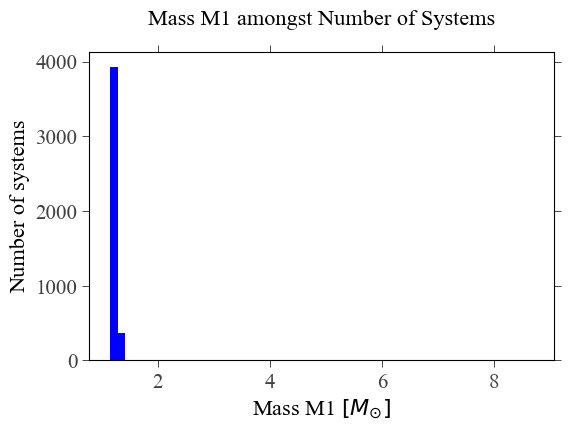

In [32]:
plt.rcParams["font.family"] = "Times New Roman"  # Font

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))
ax.hist(M1, bins=60, color='blue')

ax.set_xlabel('Mass M1 $[M_{\odot}]$', fontsize=16)
ax.set_ylabel('Number of systems', fontsize=16)
#ax.set_yscale('log')

ax.set_title('Mass M1 amongst Number of Systems', fontsize=16, pad=20)

# Formatting x and y axis ticks
ax.tick_params(axis='both', which='major', labelsize= 16, width=1, length=5, top = True)
ax.tick_params(which='major', width=.5, length=5, labelsize=15, labelcolor='0.25', right = True)

plt.show()

# Mass 2

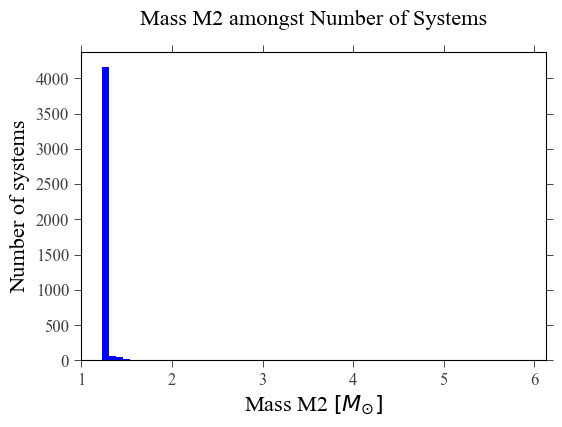

In [33]:
plt.rcParams["font.family"] = "Times New Roman"  # Font

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))
ax.hist(M2, bins=60, color='blue')

ax.set_xlabel('Mass M2 $[M_{\odot}]$', fontsize=16)
ax.set_ylabel('Number of systems', fontsize=16)
#ax.set_yscale('log')

ax.set_title('Mass M2 amongst Number of Systems', fontsize=16, pad=20)

# Formatting x and y axis ticks
ax.tick_params(axis='both', which='major', labelsize= 16, width=1, length=5, top = True)
ax.tick_params(which='major', width=.5, length=5, labelsize=12, labelcolor='0.25', right = True)

plt.show()

# Compact merger formation

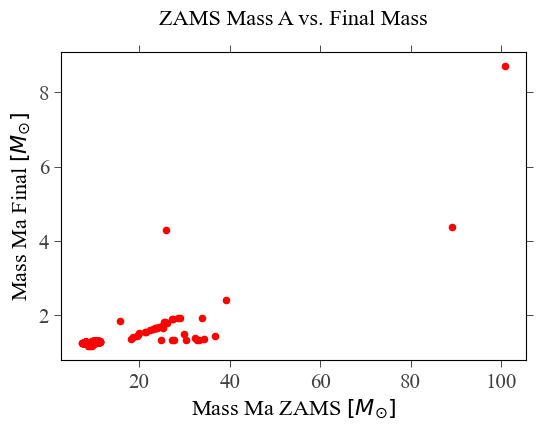

In [44]:
plt.rcParams["font.family"] = "Times New Roman"  # Font

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))
plt.scatter(x=zamsA, y=M1, s=20, color='red')
# plt.plot(M1, M2, 'r--', M2, M2, 'bs')
ax.set_xlabel('Mass Ma ZAMS $[M_{\odot}]$', fontsize=16)
ax.set_ylabel('Mass Ma Final $[M_{\odot}]$', fontsize=16)
ax.set_title('ZAMS Mass A vs. Final Mass', fontsize=16, pad=20)

# Formatting x and y axis ticks
ax.tick_params(axis='both', which='major', labelsize= 16, width=1, length=5, top = True)
ax.tick_params(which='major', width=.5, length=5, labelsize=15, labelcolor='0.25', right = True)

plt.show()

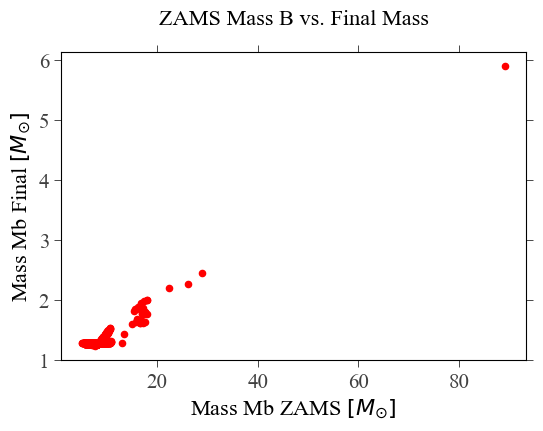

In [35]:
plt.rcParams["font.family"] = "Times New Roman"  # Font

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))
plt.scatter(x=zamsB, y=M2, s=20, color='red')
# plt.plot(M1, M2, 'r--', M2, M2, 'bs')
ax.set_xlabel('Mass Mb ZAMS $[M_{\odot}]$', fontsize=16)
ax.set_ylabel('Mass Mb Final $[M_{\odot}]$', fontsize=16)
ax.set_title('ZAMS Mass B vs. Final Mass', fontsize=16, pad=20)

# Formatting x and y axis ticks
ax.tick_params(axis='both', which='major', labelsize= 16, width=1, length=5, top = True)
ax.tick_params(which='major', width=.5, length=5, labelsize=15, labelcolor='0.25', right = True)

plt.show()

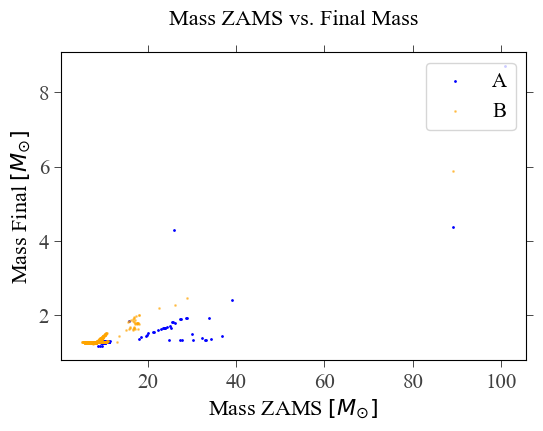

In [36]:
plt.rcParams["font.family"] = "Times New Roman"  # Font

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))

plt.scatter(x=zamsA, y=M1, s=1, c='b', label = "A") 
plt.scatter(x=zamsB, y=M2, s=1, c='orange', label = "B", alpha = 0.5)

ax.set_xlabel('Mass ZAMS $[M_{\odot}]$', fontsize=16)
ax.set_ylabel('Mass Final $[M_{\odot}]$', fontsize=16)
ax.set_title('Mass ZAMS vs. Final Mass', fontsize=16, pad=20)

ax.legend(loc='upper right', ncols=1, fontsize = 15) # Displays the labels of each line on the graph

# Formatting x and y axis ticks
ax.tick_params(axis='both', which='major', labelsize= 16, width=1, length=5, top = True)
ax.tick_params(which='major', width=.5, length=5, labelsize=15, labelcolor='0.25', right = True)

plt.show()

# Adding error bars from data on website and ZAMS(A)

In [37]:
# results
### res 1:zams to bh mass; drawing from observations: which zams masses can form a given black hole using a few black holes in the system (LiGO) 
# res 1: Does star A versus star B make different black holes?

# res 2: How does Z impact the BHs you can make  
# res 2: What Z did LIGO BHs form from
# making scatterplots for the different metallicities

# for another project: looking into a0 and mass ratio/formation channels
# showing the catalog plot and what is GWP and the growing amount of BBHs
# displaying the new graphs with each slide (4)

In [38]:
# Error bars using the data files on the LIGO website 
# Creating A scatter plot comparing the ZAMS across both metallicities (for instance: ZamsA1 vs ZamsA2 and ZamsB1 vs ZamsB2

In [39]:
# filepath = "/mnt/data/example_file_startrack.dat"
file_name = 'compact_0001.dat' # example of one of the files (but we can change this)
filepath = path+file_name

In [40]:
# read in the data 

filepath = path+file_name
df2 = parse_dat_file_to_dataframe(filepath)

print(df2.head())

# example for how to obtain units 
print("\nUnits for Ma:", df2.attrs["units"]['Ma'])
# df.to_csv("parsed_startrack_data.csv", index=False)


# filepath = path+file_name
# df = parse_dat_file_to_dataframe(filepath)

# # Show a sample
# print(df.head())

          t    Ka    Kb         Ma         Mb              a         e  \
0  5.685658  14.0  14.0  39.039574  23.306562     316.183116  0.003818   
1  5.732926  14.0  14.0  16.341111  16.114380    6977.586244  0.009113   
2  5.899358  14.0  14.0  33.645150  18.009124   10525.245460  0.007576   
3  3.875996  14.0  14.0  48.715149  40.896470  101673.257860  0.565840   
4  4.272228  14.0  14.0  43.191597  47.530079   20490.339418  0.162982   

     ta_end    tb_end  inbin  ...    ttms1b    tthg1b  ttrgb1b  ttcheb1b  \
0  3.836530  5.685657    1.0  ...  5.295223  5.299019     -1.0  5.485724   
1  5.681121  5.732925    1.0  ...  5.243114  5.249347     -1.0  5.666209   
2  4.078307  5.899357    1.0  ...  5.446242  5.451573     -1.0  5.817366   
3  3.721754  3.875995    1.0  ...  3.551277  3.553047     -1.0  3.867888   
4  3.518585  4.272227    1.0  ...  3.957537  3.959322     -1.0  4.263866   

    ttagb1b  tthems1b  tthehg1b  tthergb1b  \
0 -1.000000  5.683521 -1.000000       -1.0   
1 -1.0

In [41]:
# Plot some data 

# print(df['col_0']) # these are the final compact object masses 
M1_0001 = df2['Ma'].values # 'final mass of star 1 that was the more massive one on ZAMS in [Msun]'
print(M1_0001)

M2_0001 = df2['Mb'].values ## 'final mass of star 1 that was the more massive one on ZAMS in [Msun]' [double check]
print(M2_0001)

zamsA_0001 = df2['Mzamsa'].values
zamsB_0001 = df2['Mzamsb'].values

[39.039574 16.341111 33.64515  ... 27.325456 23.325942 38.093957]
[23.306562 16.11438  18.009124 ... 19.431585 17.030904 18.839256]


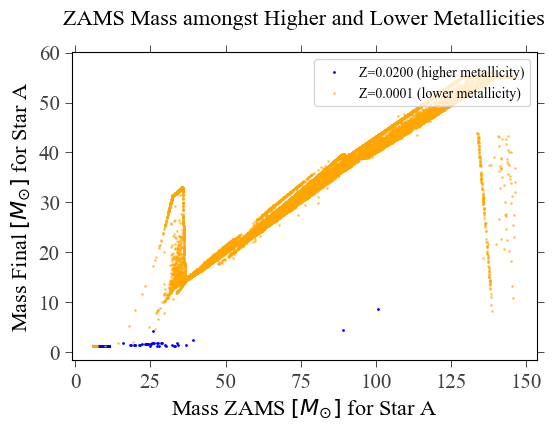

In [42]:
plt.rcParams["font.family"] = "Times New Roman"  # Font

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))

plt.scatter(x=zamsA, y=M1, s=1, c='b', label = "Z=0.0200 (higher metallicity)") # compact_0200 
plt.scatter(x=zamsA_0001, y=M1_0001, s=1, c='orange', label = "Z=0.0001 (lower metallicity)", alpha = 0.5) # compact_0001

ax.set_xlabel('Mass ZAMS $[M_{\odot}]$ for Star A', fontsize=16)
ax.set_ylabel('Mass Final $[M_{\odot}]$ for Star A', fontsize=16)
ax.set_title('ZAMS Mass amongst Higher and Lower Metallicities', fontsize=16, pad=20)

ax.legend(loc='upper right', ncols=1, fontsize = 10) # Displays the labels of each line on the graph

# Formatting x and y axis ticks
ax.tick_params(axis='both', which='major', labelsize= 16, width=1, length=5, top = True)
ax.tick_params(which='major', width=.5, length=5, labelsize=15, labelcolor='0.25', right = True)

plt.show()

# Adding error bars from data on website and ZAMS(A)

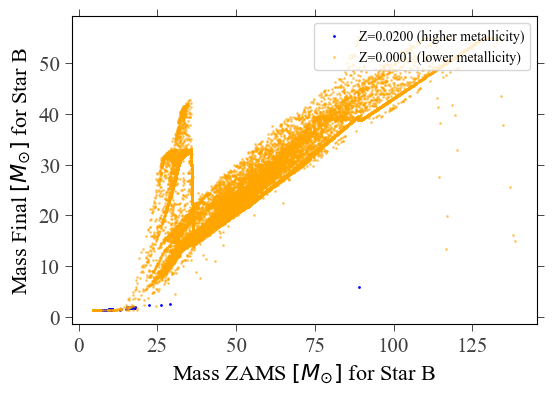

In [43]:
plt.rcParams["font.family"] = "Times New Roman"  # Font

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))

plt.scatter(x=zamsB, y=M2, s=1, c='b', label = "Z=0.0200 (higher metallicity)") # compact_0200 
plt.scatter(x=zamsB_0001, y=M2_0001, s=1, c='orange', label = "Z=0.0001 (lower metallicity)", alpha = 0.5) # compact_0001

ax.set_xlabel('Mass ZAMS $[M_{\odot}]$ for Star B', fontsize=16)
ax.set_ylabel('Mass Final $[M_{\odot}]$ for Star B', fontsize=16)
#ax.set_title('Mass ZAMS vs. Final Mass')

ax.legend(loc='upper right', ncols=1, fontsize = 10) # Displays the labels of each line on the graph

# Formatting x and y axis ticks
ax.tick_params(axis='both', which='major', labelsize= 16, width=1, length=5, top = True)
ax.tick_params(which='major', width=.5, length=5, labelsize=15, labelcolor='0.25', right = True)

plt.show()

# Adding error bars from data on website and ZAMS(A)